In [17]:
from IPython.display import HTML
HTML("<iframe src=http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data width=300 height=200></iframe>")

![Iris](https://pbs.twimg.com/media/C4rM4l4UMAEaiPs.png:large)

# Exploring the Data

In [18]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [19]:
# print the iris data
# print(iris.data)

In [20]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# print integers representing the species of each observation
print(iris.target)

# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [22]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
# check the shape of the features
# (first dimension = number of observations, 
# second dimensions = number of features)
print(iris.data.shape)

# check the shape of the response
#(single dimension matching the number of observations)
print(iris.target.shape)

(150, 4)
(150,)


# Loading the Data

In [24]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

# check the shapes of X and y
print("The original shape of X:", X.shape)
print("The original shape of y:", y.shape)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# print the shapes of the new X and y objects
print()
print("After 60% - 40% split")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

The original shape of X: (150, 4)
The original shape of y: (150,)

After 60% - 40% split
(90, 4) (90,)
(60, 4) (60,)


### Using `Logistic Regression` classification model

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import accuracy_score

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print("predicted results:", accuracy_score(y_test, y_pred))

predicted results: 0.95


In [26]:
# on the other hand, if train the model and test it on the same dataset, the result would be different
# 
# predict the response values for the observations in X
logreg_y_pred = logreg.predict(X)

# compute classification accuracy for the logistic regression model
from sklearn.metrics import accuracy_score
print("predicted results on observation:", accuracy_score(y, logreg_y_pred))

predicted results on observation: 0.946666666667


### Try the dataset on `kNN` algorithm with K=5

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("kNN (k=5):", accuracy_score(y_test, y_pred))

kNN (k=5): 0.966666666667


### Repeat `kNN` with K=1

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("kNN (k=5):", accuracy_score(y_test, y_pred))

kNN (k=5): 0.95


### Can we locate an even better value for K?

In [29]:
# try K=1 through K=25 and record testing accuracy
# plot them out and let's see how the results change

k_range = list(range(1, 26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

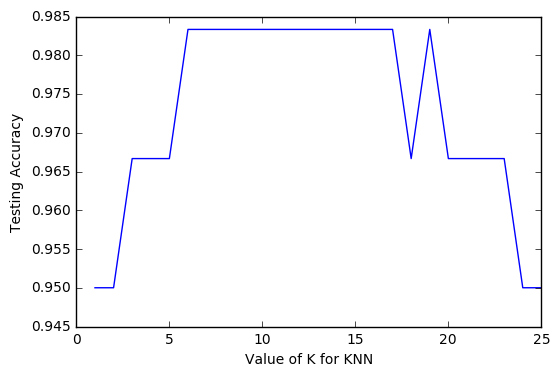

In [30]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Steps for K-fold cross-validation

1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

In [31]:
# a better way to examine the model performance

# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{!s:9} {} {!s:25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
1         [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]              
2         [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]              
3         [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]         
4         [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]         
5         [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]         


# Cross-validation: Parameter tuning

**Goal**: Select the best tuning parameters (aka `"hyperparameters"`) for KNN on the iris dataset

In [48]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [49]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [56]:
# search for an optimal value of K for KNN

import numpy as np

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print("k_scores range:", round(np.amax(k_scores), 4), round(np.amin(k_scores), 4))

k_scores range: 0.98 0.9533


In [57]:
# find out what are the values of k that made the highest scores

max = 0
for i in range(len(k_scores)):
    if k_scores[i] > max:
        max = k_scores[i]

maxes = []
for i in range(len(k_scores)):
    if k_scores[i] == max:
        maxes.append((k_scores[i], i+1))
        
for i in maxes:
    print("the score:", i[0], ",", "the location:", i[1])

the score: 0.98 , the location: 13
the score: 0.98 , the location: 18
the score: 0.98 , the location: 20


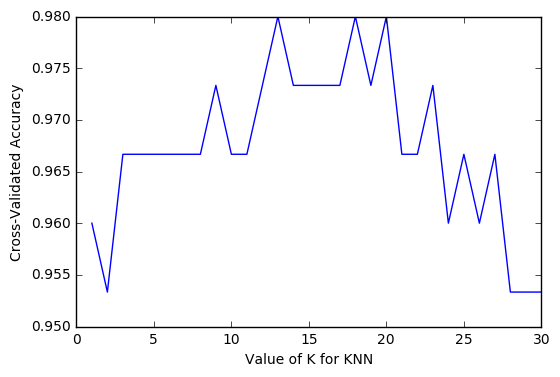

In [58]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Cross-validation: Model selection

In [59]:
# 10-fold cross-validation with the best KNN model

knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [60]:
# 10-fold cross-validation with logistic regression

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333
